<a href="https://colab.research.google.com/github/greatex98/Getting-started/blob/main/Machine_Learning_Assignment_1_Hyunsu_shin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Machine Learning Project.

#Classification Machine Learning Project.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


The dataset contains cases from a study that was conducted between 1958 and 1970 on the survival of patients who had undergone surgery for breast cancer.

In [ ]:
df=pd.read_csv("/content/sample_data/a1_data (1).csv",names=['Age', 'Year', 'Nodes', 'Survival_Status'])

In [ ]:
df.head()

,Age,Year,Nodes,Survival_Status
0,30.0,64.0,1.0,1
1,30.0,62.0,3.0,1
2,30.0,65.0,0.0,1
3,31.0,59.0,2.0,1
4,31.0,65.0,4.0,1


In [ ]:
df.isna().sum()

,0
Age,2
Year,1
Nodes,2
Survival_Status,0


In [ ]:
df_cleaned=df.dropna()
df_cleaned.isna().sum()

,0
Age,0
Year,0
Nodes,0
Survival_Status,0


Data exploration

In [ ]:
df.describe()

,Age,Year,Nodes,Survival_Status
count,304.000000,305.000000,304.000000,306.000000
mean,52.559211,62.842623,4.046053,1.264706
std,10.764343,3.249720,7.208666,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,65.000000,4.250000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<Axes: >

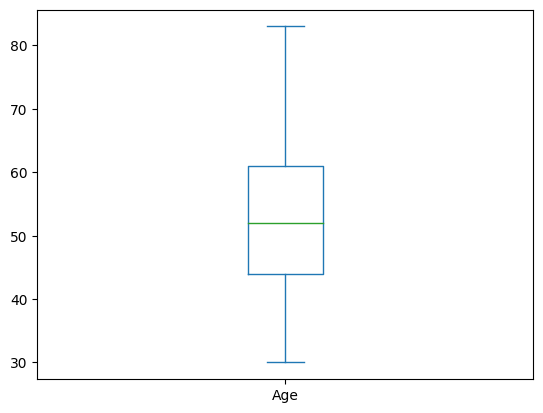

In [ ]:
df['Age'].plot(kind='box')

<Axes: ylabel='Frequency'>

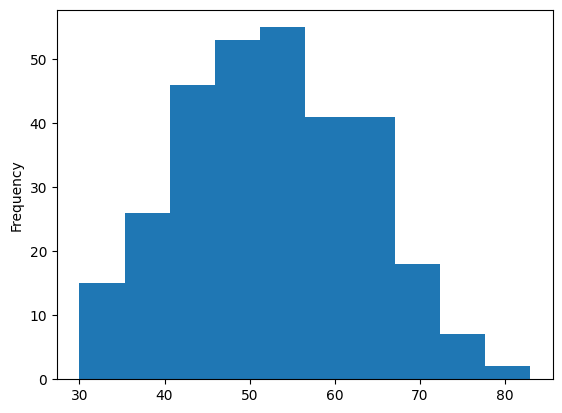

In [ ]:
df['Age'].plot(kind='hist',bins=10)

In [ ]:
df['Survival_Status'].value_counts()

,count
Survival_Status,
1,225
2,81


<Axes: title={'center': 'Survival Status'}, ylabel='count'>

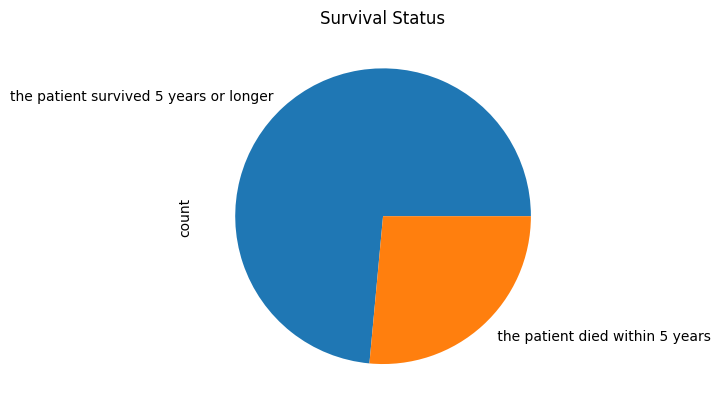

In [ ]:
df['Survival_Status'].value_counts().plot(kind='pie', title="Survival Status",labels=['the patient survived 5 years or longer',' the patient died within 5 years'])


In [ ]:
# Features: Age, Year, Nodes
x = df_cleaned[['Age', 'Year', 'Nodes']]

# Labels: Survival_Status
y = df_cleaned['Survival_Status']

# Split into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Scaling the features to standardize the data for better performance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(x_test_scaled)

# Evaluate the model
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Results:
              precision    recall  f1-score   support

           1       0.76      0.93      0.84        45
           2       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61

Accuracy: 0.7377049180327869


In [ ]:
# Support Vector Machine model
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(x_test_scaled)

# Evaluate the model
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Results:
              precision    recall  f1-score   support

           1       0.77      0.91      0.84        45
           2       0.50      0.25      0.33        16

    accuracy                           0.74        61
   macro avg       0.64      0.58      0.59        61
weighted avg       0.70      0.74      0.70        61

Accuracy: 0.7377049180327869


In [ ]:
# K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(x_test_scaled)

# Evaluate the model
print("KNN Results:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Results:
              precision    recall  f1-score   support

           1       0.76      0.93      0.84        45
           2       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61

Accuracy: 0.7377049180327869


Logistic Regression Accuracy: 0.7377049180327869
SVM Accuracy: 0.7377049180327869
KNN Accuracy: 0.7377049180327869


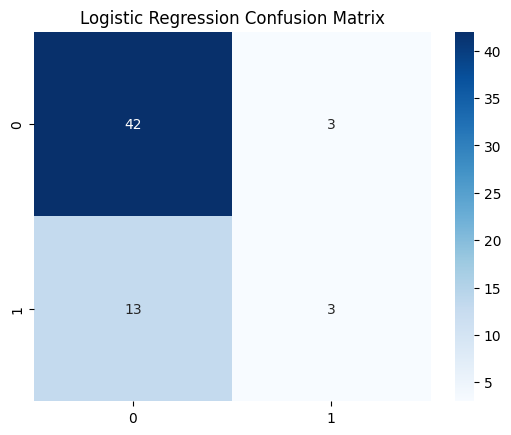

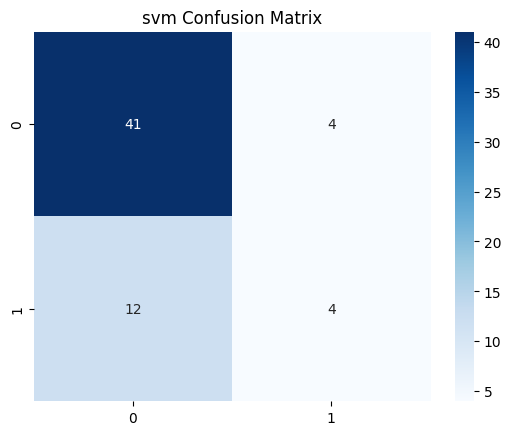

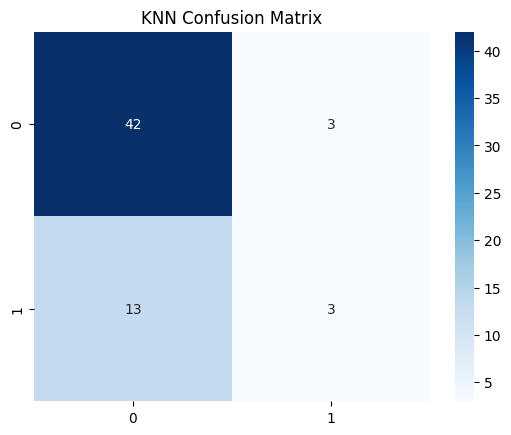

In [ ]:
# Print accuracies for comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Confusion matrix visualization for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("svm Confusion Matrix")
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()
